In [ ]:
# import packages
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import graphviz

In [ ]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

In [ ]:
pip install pydotplus

In [ ]:
pip install graphviz

In [ ]:
df_diabetes = pd.read_csv("/content/sample_data/diabetes.csv")
df_diabetes.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


Variabel Independen (X):

- Pregnancies : Number of times pregnant (mempresentasikan berapa kali wanita tersebut hamil selama hidupnya).

- Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test (mempresentasikan konsentrasi glukosa plasma pada 2 jam dalam tes toleransi glukosa).

- Blood Pressure: Diastolic blood pressure (Tekanan darah adalah cara yang sangat terkenal untuk mengukur kesehatan jantung seseorang, ada juga ukuran tekanan darah yaitu diastolik dan sistolik. Dalam data ini, kita memiliki tekanan darah diastolik dalam (mm / Hg) ketika jantung rileks setelah kontraksi).

- Skin Thickness: Triceps skin fold thickness (nilai yang digunakan untuk memperkirakan lemak tubuh (mm) yang diukur pada lengan kanan setengah antara proses olecranon dari siku dan proses akromial skapula).

- Insulin: 2-Hour serum insulin (tingkat insulin 2 jam insulin serum dalam satuan mu U/ml)

- BMI: Body mass index (Indeks Massa Tubuh (berat dalam kg / (tinggi dalam meter kuadrat), dan merupakan indikator kesehatan seseorang).

- Diabetes Pedigree Function: Diabetes pedigree function (indikator riwayat diabetes dalam keluarga)

- Age: umur seseorang (years)

Variabel Dependen (Y) :

- Outcome: Class variable (0 or 1), 0 untuk tidak mengidap diabetes, dan 1 mengidap diabetes.

In [ ]:
# columns of dataframe
df_diabetes.columns = ['pregnancies', 'glucose', 'blood_pressure', 'skin_thickness',
                       'insulin', 'bmi', 'diabetes_pedigree_function', 'age', 'outcome']
df_diabetes.columns

Index(['pregnancies', 'glucose', 'blood_pressure', 'skin_thickness', 'insulin',
       'bmi', 'diabetes_pedigree_function', 'age', 'outcome'],
      dtype='object')

In [ ]:
# dataframe
df_diabetes

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
# shape of dataframe
df_diabetes.shape

(768, 9)

In [ ]:
# concise of summary of a dataframe
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   pregnancies                 768 non-null    int64  
 1   glucose                     768 non-null    int64  
 2   blood_pressure              768 non-null    int64  
 3   skin_thickness              768 non-null    int64  
 4   insulin                     768 non-null    int64  
 5   bmi                         768 non-null    float64
 6   diabetes_pedigree_function  768 non-null    float64
 7   age                         768 non-null    int64  
 8   outcome                     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# count for the occurence of dataframe
df_diabetes.count()

pregnancies                   768
glucose                       768
blood_pressure                768
skin_thickness                768
insulin                       768
bmi                           768
diabetes_pedigree_function    768
age                           768
outcome                       768
dtype: int64

In [ ]:
# generate descriptive statistics of dataframe
df_diabetes.describe()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
# correlation
corr = df_diabetes.corr()
corr

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,outcome
pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
blood_pressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skin_thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
diabetes_pedigree_function,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


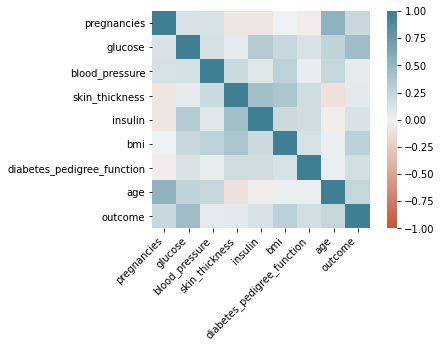

In [ ]:
# heatmap
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [ ]:
# feature selection
feature_cols = ['pregnancies', 'insulin', 'bmi', 'age', 'glucose', 'blood_pressure', 'diabetes_pedigree_function']
x = df_diabetes[feature_cols]
y = df_diabetes.outcome

x

,pregnancies,insulin,bmi,age,glucose,blood_pressure,diabetes_pedigree_function
0,6,0,33.6,50,148,72,0.627
1,1,0,26.6,31,85,66,0.351
2,8,0,23.3,32,183,64,0.672
3,1,94,28.1,21,89,66,0.167
4,0,168,43.1,33,137,40,2.288
...,...,...,...,...,...,...,...
763,10,180,32.9,63,101,76,0.171
764,2,0,36.8,27,122,70,0.340
765,5,112,26.2,30,121,72,0.245
766,1,0,30.1,47,126,60,0.349


In [ ]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: outcome, Length: 768, dtype: int64

In [ ]:
# split data with 80% of training and 20% of testing (80:20)
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [ ]:
X_train

,pregnancies,insulin,bmi,age,glucose,blood_pressure,diabetes_pedigree_function
762,9,0,22.5,33,89,62,0.142
127,1,94,33.3,23,118,58,0.261
564,0,0,32.4,27,91,80,0.601
375,12,325,39.2,58,140,82,0.528
663,9,130,37.9,40,145,80,0.637
...,...,...,...,...,...,...,...
763,10,180,32.9,63,101,76,0.171
192,7,0,30.4,36,159,66,0.383
629,4,0,24.7,21,94,65,0.148
559,11,0,30.1,35,85,74,0.300


In [ ]:
X_test

,pregnancies,insulin,bmi,age,glucose,blood_pressure,diabetes_pedigree_function
661,1,0,42.9,22,199,76,1.394
122,2,100,33.6,23,107,74,0.404
113,4,0,34.0,25,76,62,0.391
14,5,175,25.8,51,166,72,0.587
529,0,0,24.6,31,111,65,0.660
...,...,...,...,...,...,...,...
366,6,0,27.6,29,124,72,0.368
301,2,135,31.6,25,144,58,0.422
382,1,182,25.4,21,109,60,0.947
140,3,0,21.1,55,128,78,0.268


In [ ]:
Y_train

762    0
127    0
564    0
375    1
663    1
      ..
763    0
192    1
629    0
559    0
684    0
Name: outcome, Length: 576, dtype: int64

In [ ]:
Y_test

661    1
122    0
113    0
14     1
529    0
      ..
366    1
301    1
382    0
140    0
463    0
Name: outcome, Length: 192, dtype: int64

In [ ]:
# Shape of X_train, X_test, Y_train, and Y_test
print("Shape of X_train =", X_train.shape)
print("Shape of X_test =", X_test.shape)
print("Shape of Y_train =", Y_train.shape)
print("Shape of Y_test =", Y_test.shape)

Shape of X_train = (576, 7)
Shape of X_test = (192, 7)
Shape of Y_train = (576,)
Shape of Y_test = (192,)


In [ ]:
# build model and use the 'Entropy' criterion for decision tree classifier
classifier = DecisionTreeClassifier(max_depth=4, criterion='entropy')
classifier.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
# predict the value
y_pred = classifier.predict(X_test)
print(y_pred)

[1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0
 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0
 0 0 0 0 0 0 0]


In [ ]:
# confusion matrix
confusion_matrix(Y_test, y_pred)
print(confusion_matrix(Y_test, y_pred))

# accuracy
print("Accuracy:", metrics.accuracy_score(Y_test,y_pred))

[[115  15]
 [ 37  25]]
Accuracy: 0.7291666666666666


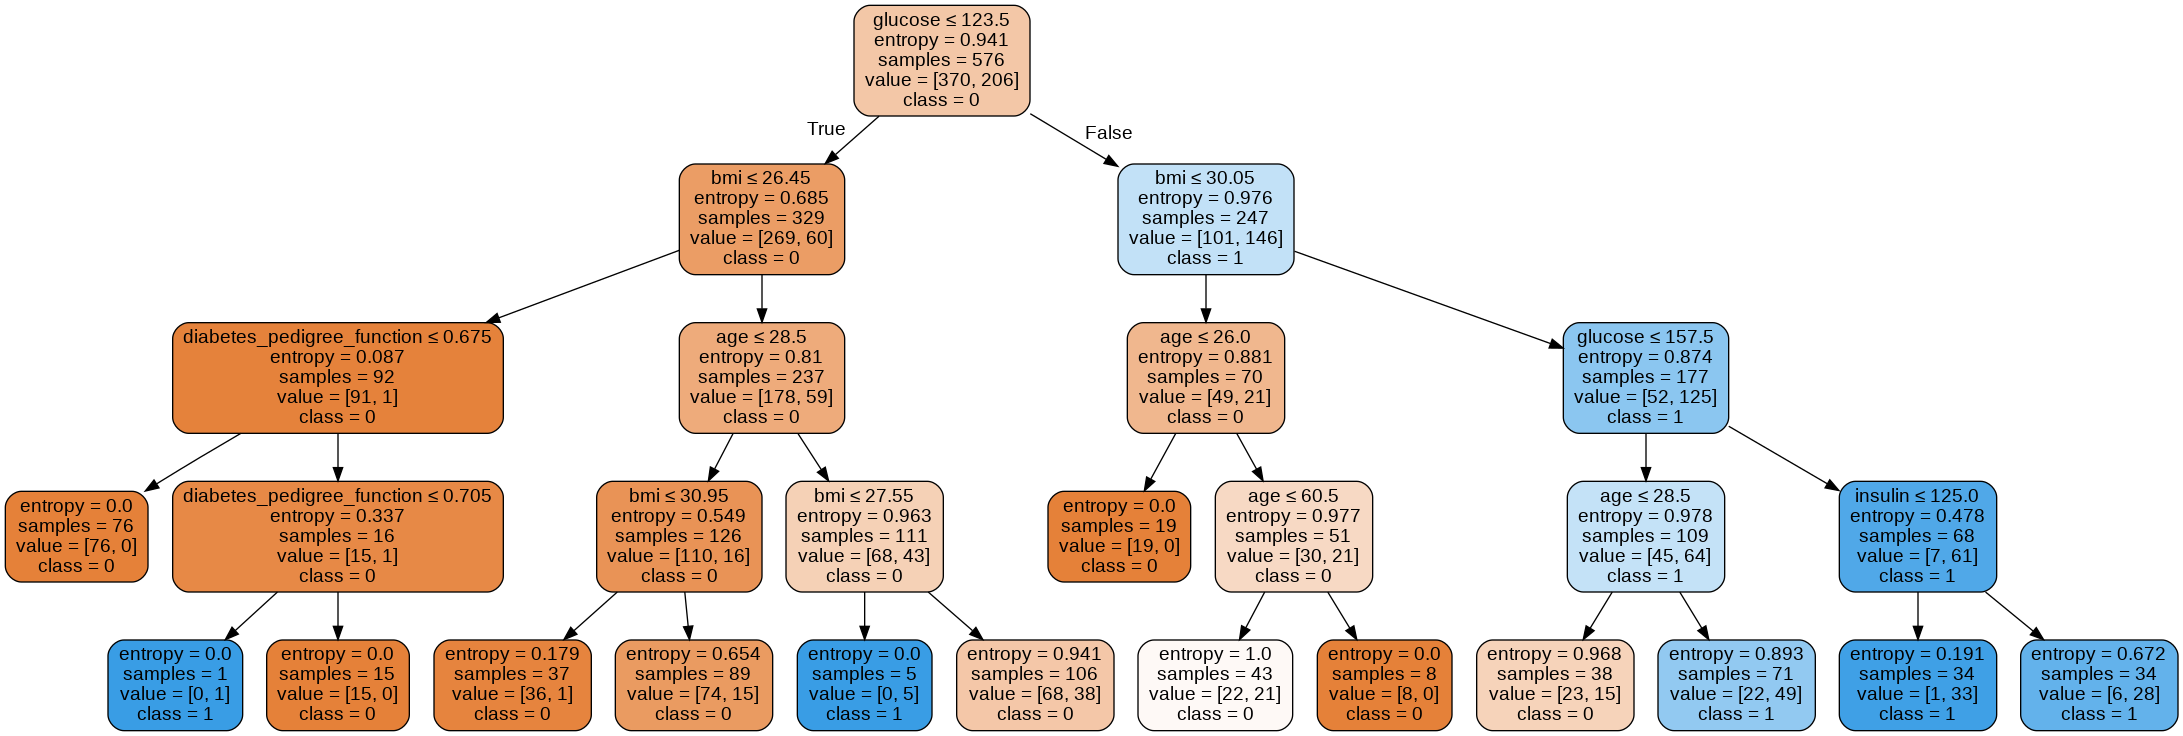

In [ ]:
# display the decision tree
dot_data = StringIO()
export_graphviz(
    classifier,
    out_file=dot_data,  
    filled=True,
    rounded=True,
    special_characters=True,
    feature_names = feature_cols,
    class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())